In [139]:
%reset -f

In [140]:
import yfinance as yf
import pandas as pd


data = yf.download('AMZN', start='2015-01-01', end='2023-12-31')


data.reset_index(inplace=True)

data_cleaned = data[['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

data_cleaned.to_csv('amazon_stock_data_cleaned.csv', index=False)

print("Cleaned Data Preview:")
print(data_cleaned.head())

print("Cleaned data has been saved to 'amazon_stock_data_cleaned.csv'.")


[*********************100%***********************]  1 of 1 completed

Cleaned Data Preview:
Price        Date Adj Close    Close     High      Low     Open    Volume
Ticker                 AMZN     AMZN     AMZN     AMZN     AMZN      AMZN
0      2015-01-02   15.4260  15.4260  15.7375  15.3480  15.6290  55664000
1      2015-01-05   15.1095  15.1095  15.4190  15.0425  15.3505  55484000
2      2015-01-06   14.7645  14.7645  15.1500  14.6190  15.1120  70380000
3      2015-01-07   14.9210  14.9210  15.0640  14.7665  14.8750  52806000
4      2015-01-08   15.0230  15.0230  15.1570  14.8055  15.0160  61768000
Cleaned data has been saved to 'amazon_stock_data_cleaned.csv'.


In [141]:
import yfinance as yf
import pandas as pd

# 下载亚马逊股票数据（2015-2023年）
data = yf.download('AMZN', start='2015-01-01', end='2023-12-31')

# 查看数据
print(data.head())

# 保存数据到本地（可选）
# data.to_csv("AMZN_stock_data.csv")


[*********************100%***********************]  1 of 1 completed

Price      Adj Close    Close     High      Low     Open    Volume
Ticker          AMZN     AMZN     AMZN     AMZN     AMZN      AMZN
Date                                                              
2015-01-02   15.4260  15.4260  15.7375  15.3480  15.6290  55664000
2015-01-05   15.1095  15.1095  15.4190  15.0425  15.3505  55484000
2015-01-06   14.7645  14.7645  15.1500  14.6190  15.1120  70380000
2015-01-07   14.9210  14.9210  15.0640  14.7665  14.8750  52806000
2015-01-08   15.0230  15.0230  15.1570  14.8055  15.0160  61768000


In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 选择特征和目标
features = ['Open', 'High', 'Low', 'Close']
target = 'Adj Close'

X = data[features]
y = data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Random Forest‘s RMSE: {rmse:.2f}")


/Users/anzhenghao/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest‘s RMSE: 0.70


In [143]:

data_2024 = yf.download('AMZN', start='2024-01-01', end='2024-01-31')


X_2024 = data_2024[features]

y_pred_2024 = rf_model.predict(X_2024)


y_pred_2024 = y_pred_2024.ravel()


result = pd.DataFrame({
    'Date': data_2024.index,
    'Actual Close': data_2024['Adj Close'],
    'Predicted Close': y_pred_2024
})

print(result)



[*********************100%***********************]  1 of 1 completed


ValueError: Data must be 1-dimensional, got ndarray of shape (20, 1) instead

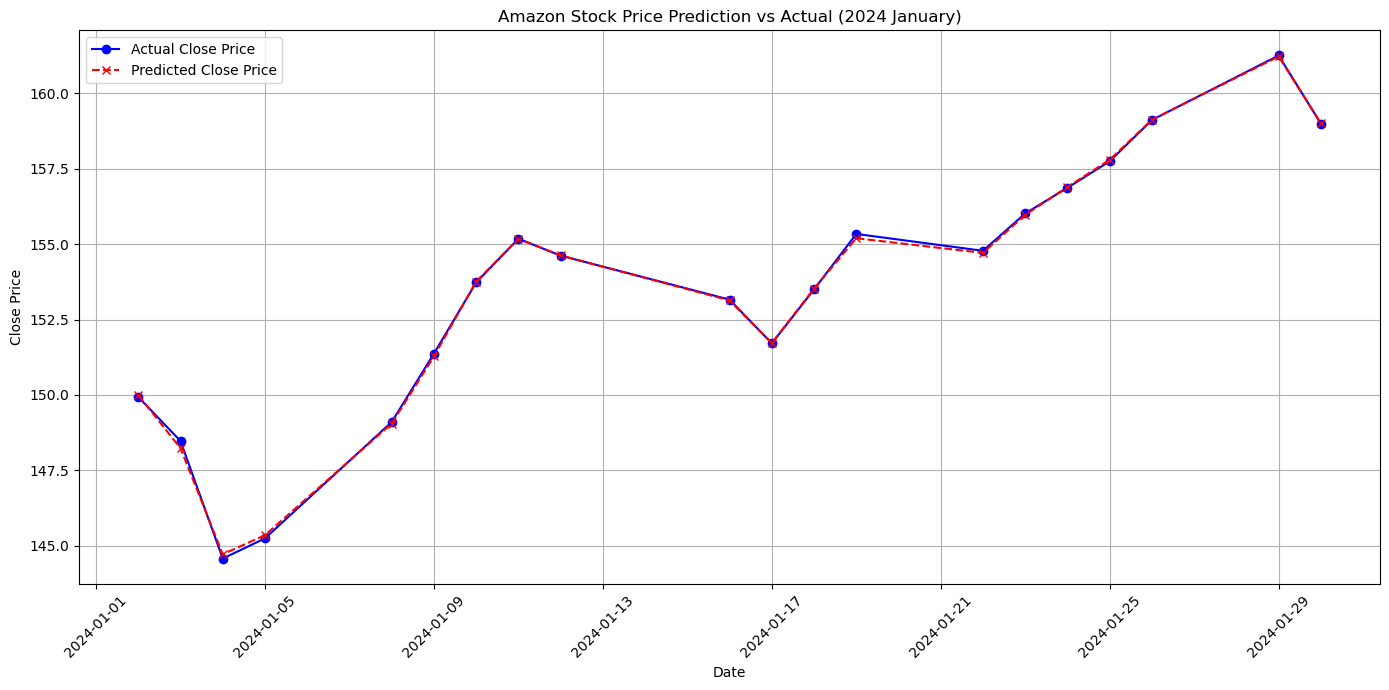

In [144]:
import matplotlib.pyplot as plt

# 绘制实际值与预测值的对比图
plt.figure(figsize=(14, 7))
plt.plot(data_2024.index, data_2024['Adj Close'], label='Actual Close Price', marker='o', linestyle='-', color='blue')
plt.plot(data_2024.index, y_pred_2024, label='Predicted Close Price', marker='x', linestyle='--', color='red')
plt.title('Amazon Stock Price Prediction vs Actual (2024 January)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # 日期倾斜显示
plt.tight_layout()
plt.show()


In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 实际值和预测值
y_true = data_2024['Adj Close'].values
y_pred = y_pred_2024

# 计算指标
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 输出结果
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.08
Mean Absolute Error (MAE): 0.06
Mean Absolute Percentage Error (MAPE): 3.21%


In [58]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [68]:
# 下载亚马逊股票数据
data = yf.download('AMZN', start='2015-01-01', end='2023-12-31')

# 查看数据的前几行
print(data.head())

# 提取目标列 (Adj Close)
data = data[['Adj Close']]

# 检查缺失值并填充（如果有）
data = data.dropna()

# 使用 MinMaxScaler 对数据进行归一化
scaler = MinMaxScaler(feature_range=(0, 1))
data['Normalized Adj Close'] = scaler.fit_transform(data[['Adj Close']])


# 查看归一化后的数据
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close    Close     High      Low     Open    Volume
Ticker          AMZN     AMZN     AMZN     AMZN     AMZN      AMZN
Date                                                              
2015-01-02   15.4260  15.4260  15.7375  15.3480  15.6290  55664000
2015-01-05   15.1095  15.1095  15.4190  15.0425  15.3505  55484000
2015-01-06   14.7645  14.7645  15.1500  14.6190  15.1120  70380000
2015-01-07   14.9210  14.9210  15.0640  14.7665  14.8750  52806000
2015-01-08   15.0230  15.0230  15.1570  14.8055  15.0160  61768000
Price      Adj Close Normalized Adj Close
Ticker          AMZN                     
Date                                     
2015-01-02   15.4260             0.006262
2015-01-05   15.1095             0.004424
2015-01-06   14.7645             0.002421
2015-01-07   14.9210             0.003330
2015-01-08   15.0230             0.003922


In [70]:
# 创建滑动窗口数据
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# 使用 'Normalized Adj Close' 创建时间序列
time_steps = 60  # 滑动窗口长度为 60 天
X, y = create_sequences(data['Normalized Adj Close'].values, time_steps)

# 调整 X 的形状为 (样本数, 时间步长, 特征数)
X = X.reshape((X.shape[0], X.shape[1], 1))

# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 查看数据形状
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1763, 60, 1), y_train shape: (1763,)
X_test shape: (441, 60, 1), y_test shape: (441,)


Epoch 1/20


/Users/anzhenghao/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0695 - val_loss: 0.0041
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0048 - val_loss: 0.0024
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0018 - val_loss: 0.0024
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0017 - val_l

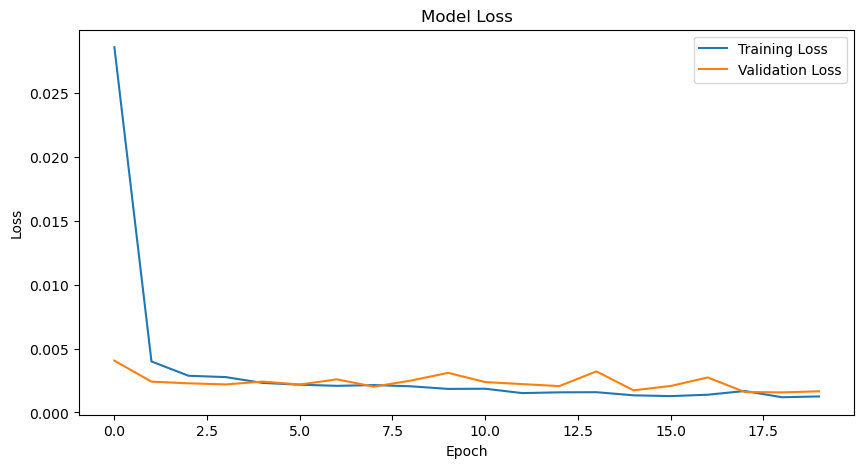

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 构建 LSTM 模型
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # 输出一个值
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), verbose=1)

# 绘制训练和验证损失
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [75]:
# 下载 2024 年 1 月的数据
data_2024 = yf.download('AMZN', start='2024-01-01', end='2024-01-31')

# 获取最后 60 天的数据作为输入
last_60_days = data[['Adj Close']].values[-60:]  # 获取原始 'Adj Close' 数据
last_60_days_scaled = scaler.transform(last_60_days)  # 对数据进行归一化

# 构建 2024 年 1 月的输入数据
X_2024 = []
current_input = last_60_days_scaled
for _ in range(len(data_2024)):
    # 输入最后 60 天的数据
    X_2024.append(current_input[-60:])  # 构造时间序列
    next_pred = model.predict(np.array([X_2024[-1]]))  # 预测下一个值
    current_input = np.append(current_input, next_pred).reshape(-1, 1)  # 更新输入序列

# 转换为 NumPy 数组
X_2024 = np.array(X_2024)

# 预测 2024 年的调整收盘价
y_pred_2024 = model.predict(X_2024)

# 确保 y_pred_2024 是二维数组
y_pred_2024 = y_pred_2024.reshape(-1, 1)

# 反归一化预测值
y_pred_2024_original = scaler.inverse_transform(y_pred_2024)

# 添加预测结果到 2024 年数据
data_2024['Predicted Adj Close'] = y_pred_2024_original

# 打印结果
print(data_2024)


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Price        Adj Close       Close        High         Low        Open  \
Ticker            AMZN        AMZN        AMZN        AMZN        AMZN   
Date                                               

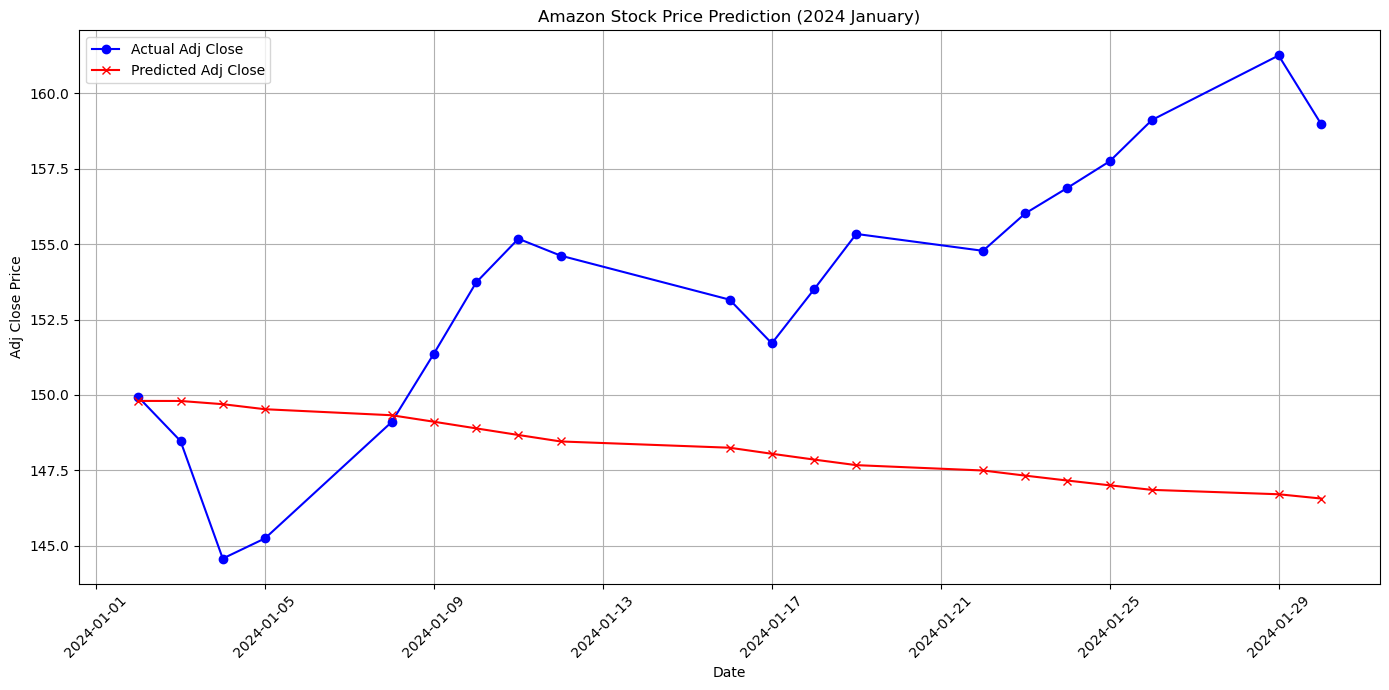

In [77]:
import matplotlib.pyplot as plt

# 绘制真实值与预测值对比
plt.figure(figsize=(14, 7))
plt.plot(data_2024.index, data_2024['Adj Close'], label='Actual Adj Close', marker='o', color='blue')
plt.plot(data_2024.index, data_2024['Predicted Adj Close'], label='Predicted Adj Close', marker='x', color='red')
plt.title('Amazon Stock Price Prediction (2024 January)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [78]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 提取真实值和预测值
y_true = data_2024['Adj Close'].values
y_pred = data_2024['Predicted Adj Close'].values

# 计算评估指标
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 打印评估结果
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error (MSE): 56.97
Root Mean Squared Error (RMSE): 7.55
Mean Absolute Error (MAE): 6.42
Mean Absolute Percentage Error (MAPE): 3.88%


In [83]:
# 添加技术指标
data['MA10'] = data['Adj Close'].rolling(window=10).mean()
data['MA50'] = data['Adj Close'].rolling(window=50).mean()
data['Volume Change'] = data['Volume'].pct_change()

# 去除缺失值
data = data.dropna()

# 归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Adj Close', 'MA10', 'MA50', 'Volume Change']])

# 将归一化结果转化为 DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Adj Close', 'MA10', 'MA50', 'Volume Change'])
print(scaled_df.head())


   Adj Close      MA10      MA50  Volume Change
0   0.001784  0.001344  0.000000       0.090056
1   0.001358  0.000958  0.000405       0.084506
2   0.002316  0.000728  0.000871       0.151856
3   0.001751  0.000285  0.001369       0.062421
4   0.003311  0.000237  0.001881       0.253680


In [84]:
# 创建时间序列数据
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps, 0])  # 目标值是 'Adj Close'
    return np.array(X), np.array(y)

# 滑动窗口长度
time_steps = 60
X, y = create_sequences(scaled_data, time_steps)

# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 打印数据形状
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1724, 60, 4), y_train shape: (1724,)
X_test shape: (431, 60, 4), y_test shape: (431,)


Epoch 1/50


/Users/anzhenghao/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 104ms/step - loss: 0.0519 - val_loss: 0.0137 - learning_rate: 0.0010
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0061 - val_loss: 0.0052 - learning_rate: 0.0010
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0045 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.0044 - val_loss: 0.0044 - learning_rate: 0.0010
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0030 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0035 - val_loss: 0.0037 - learning_rate: 0.0010
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 0.0032 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0030 - val_loss: 0.0039 - learning_rate: 0.0010
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0031 - val_loss: 0.0033 - learning_rate: 0.0010
Epoch 10/50
54/54 ━━━━━━━━━━

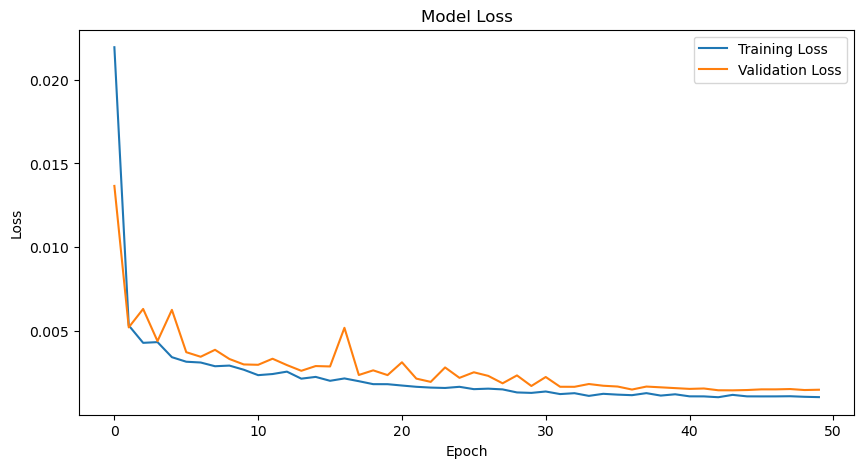

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 构建优化后的 LSTM 模型
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.3),
    Dense(25, activation='relu'),
    Dense(1)  # 输出一个值
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 回调函数
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# 训练模型
history = model.fit(
    X_train, y_train,
    batch_size=32,  # 可尝试调整为 16 或 64
    epochs=50,  # 增加训练轮次
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# 绘制损失曲线
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [87]:
# 获取最后 60 天的数据
last_60_days = scaled_data[-60:]

# 构造预测输入
X_2024 = []
current_input = last_60_days
for _ in range(len(data_2024)):
    # 输入最后 60 天的数据
    X_2024.append(current_input[-60:])  # 保存当前输入
    next_pred = model.predict(np.array([X_2024[-1]]))  # 预测下一个值

    # 构造新的特征行
    next_row = np.zeros((1, scaled_data.shape[1]))
    next_row[0, 0] = next_pred  # 将预测值放在第一个特征位置（Adj Close）
    next_row[0, 1:] = current_input[-1, 1:]  # 复制最后一行的其他特征（如 MA10、MA50 等）

    # 更新输入序列
    current_input = np.append(current_input, next_row, axis=0)

# 转换为 NumPy 数组
X_2024 = np.array(X_2024)

# 预测值反归一化
y_pred_2024 = model.predict(X_2024)
y_pred_2024_original = scaler.inverse_transform(
    np.concatenate([y_pred_2024, np.zeros((y_pred_2024.shape[0], scaled_data.shape[1] - 1))], axis=1)
)[:, 0]

# 添加预测结果到 2024 年数据
data_2024['Predicted Adj Close'] = y_pred_2024_original

# 打印结果
print(data_2024)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
Price        Adj Close       Close        High         Low        Open  \
Ticker            AMZN        AMZN        AMZN        AMZN        AMZN   
Date                                                 

In [90]:
# GRU
# 数据处理和科学计算
import numpy as np
import pandas as pd
import yfinance as yf

# 机器学习工具
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 深度学习工具
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt


In [91]:
# 下载亚马逊股票数据
data = yf.download('AMZN', start='2015-01-01', end='2023-12-31')

# 提取目标列 (Adj Close)
data = data[['Adj Close']]

# 检查数据是否有缺失值
print(f"缺失值数量: {data.isnull().sum().sum()}")

# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
data['Adj Close'] = scaler.fit_transform(data[['Adj Close']])

# 查看归一化后的数据
print(data.head())


[*********************100%***********************]  1 of 1 completed

缺失值数量: 0
Price      Adj Close
Ticker          AMZN
Date                
2015-01-02  0.006262
2015-01-05  0.004424
2015-01-06  0.002421
2015-01-07  0.003330
2015-01-08  0.003922


In [94]:
# 创建时间序列数据
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# 设置时间窗口
time_steps = 60  # 使用过去 30 天的数据预测下一天

# 转换为时间序列
X, y = create_sequences(data['Adj Close'].values, time_steps)

# 划分训练集和测试集
train_size = int(len(X) * 0.8)  # 80% 训练集
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 查看数据形状
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1763, 60, 1), y_train shape: (1763, 1)
X_test shape: (441, 60, 1), y_test shape: (441, 1)


In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# 构建 GRU 模型
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # 输出单值
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 查看模型结构
model.summary()


/Users/anzhenghao/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,551 (95.90 KB)

 Trainable params: 24,551 (95.90 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.5839e-04 - val_loss: 0.0012
Epoch 2/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.2863e-04 - val_loss: 0.0010
Epoch 3/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.7821e-04 - val_loss: 4.7289e-04
Epoch 4/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 7.3603e-04 - val_loss: 9.7334e-04
Epoch 5/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 6.5183e-04 - val_loss: 0.0021
Epoch 6/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 5.9228e-04 - val_loss: 0.0021
Epoch 7/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 5.4935e-04 - val_loss: 0.0035
Epoch 8/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.4504e-04 - val_loss: 0.0015
Epoch 9/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 5.0178e-04 - val_loss: 0.0025
Epoch 10/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 6.1087e-04 - val_loss: 0.0016
Epoch 11/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 5.4794e-04 - val_loss: 0.0016


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.0004e-04 - val_loss: 0.0045
Epoch 67/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.3078e-04 - val_loss: 0.0031
Epoch 68/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.9188e-04 - val_loss: 0.0031
Epoch 69/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.6692e-04 - val_loss: 0.0052
Epoch 70/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.0252e-04 - val_loss: 0.0061
Epoch 71/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.8016e-04 - val_loss: 0.0052
Epoch 72/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 3.9089e-04 - val_loss: 0.0058
Epoch 73/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.7671e-04 - val_loss: 0.0050
Epoch 74/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 3.4839e-04 - val_loss: 0.0053
Epoch 75/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.1721e-04 - val_loss: 0.0064
Epoch 76/125
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 4.4260e-04 - val_loss: 0.0037
Epoch 77/125

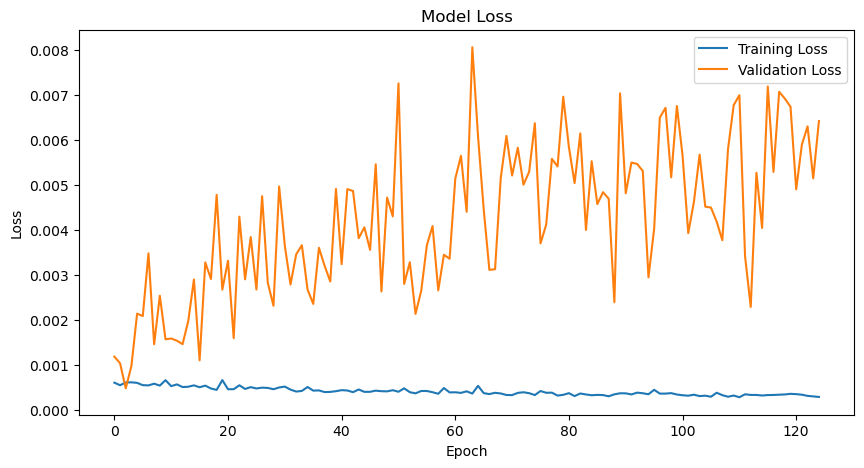

In [100]:
# 训练模型
history = model.fit(
    X_train, y_train, 
    batch_size=32,  # 批量大小，可调整为 16 或 64
    epochs=125,      # 训练轮次，可根据需求调整
    validation_data=(X_test, y_test),  # 使用测试集监控性能
    verbose=1       # 显示训练过程
)

# 绘制训练和验证损失
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [101]:
# 下载 2024 年 1 月数据
data_2024 = yf.download('AMZN', start='2024-01-01', end='2024-01-31')

# 获取最后 60 天的数据
last_60_days = data[-60:].values

# 构建预测输入
X_2024 = []
current_input = last_60_days
for _ in range(len(data_2024)):
    # 输入最后 60 天的数据
    X_2024.append(current_input[-60:])
    next_pred = model.predict(np.array([X_2024[-1]]))
    current_input = np.append(current_input, next_pred).reshape(-1, 1)  # 更新输入序列

# 转换为 NumPy 数组
X_2024 = np.array(X_2024)

# 预测 2024 年 1 月的调整收盘价
y_pred_2024 = model.predict(X_2024)

# 反归一化预测值
y_pred_2024_rescaled = scaler.inverse_transform(y_pred_2024)

# 添加预测值到 2024 年数据
data_2024['Predicted Adj Close'] = y_pred_2024_rescaled

# 打印结果
print(data_2024[['Adj Close', 'Predicted Adj Close']])


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Price        Adj Close Predicted Adj Close
Ticker            AMZN                    
Date                                      
2024-01-02  149.929993          133.032806
2024-01-03  148.470001       

In [102]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# 模型预测（在测试集上）
y_pred = model.predict(X_test)

# 反归一化预测值和真实值
y_pred_rescaled = scaler.inverse_transform(y_pred)  # 反归一化预测值
y_test_rescaled = scaler.inverse_transform(y_test)  # 反归一化真实值

# 计算评估指标
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

# 打印结果
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error (MSE): 190.60
Root Mean Squared Error (RMSE): 13.81
Mean Absolute Error (MAE): 13.13
Mean Absolute Percentage Error (MAPE): 10.80%


In [111]:
# 新的GRU
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import matplotlib.pyplot as plt
# 下载亚马逊股票数据
data = yf.download('AMZN', start='2015-01-01', end='2023-12-31')

# 提取目标列
data = data[['Adj Close', 'Volume']]

# 添加技术指标
data['MA10'] = data['Adj Close'].rolling(window=10).mean()  # 10 日移动平均线
data['MA50'] = data['Adj Close'].rolling(window=50).mean()  # 50 日移动平均线
data['Volume Change'] = data['Volume'].pct_change()  # 成交量变化率

# 去除缺失值
data = data.dropna()

# 归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
data[['Adj Close', 'MA10', 'MA50', 'Volume Change']] = scaler.fit_transform(
    data[['Adj Close', 'MA10', 'MA50', 'Volume Change']]
)

# 查看处理后的数据
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close    Volume      MA10      MA50 Volume Change
Ticker          AMZN      AMZN                                  
Date                                                            
2015-03-16  0.001784  47082000  0.001344  0.000000      0.090056
2015-03-17  0.001358  40740000  0.000958  0.000405      0.084506
2015-03-18  0.002316  53082000  0.000728  0.000871      0.151856
2015-03-19  0.001751  38314000  0.000285  0.001369      0.062421
2015-03-20  0.003311  75272000  0.000237  0.001881      0.253680


In [112]:
# 创建时间序列数据
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps, 0])  # 预测目标是 'Adj Close'
    return np.array(X), np.array(y)

# 设置时间窗口为 5 天
time_steps = 5

# 转换为时间序列
X, y = create_sequences(data[['Adj Close', 'MA10', 'MA50', 'Volume Change']].values, time_steps)

# 划分训练集和测试集
train_size = int(len(X) * 0.8)  # 80% 训练集
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 查看数据形状
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1768, 5, 4), y_train shape: (1768,)
X_test shape: (442, 5, 4), y_test shape: (442,)


Epoch 1/50


/Users/anzhenghao/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0889 - val_loss: 0.0019
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - val_loss: 0.0018
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - val_loss: 0.0021
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0022
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - val_loss: 0.0022

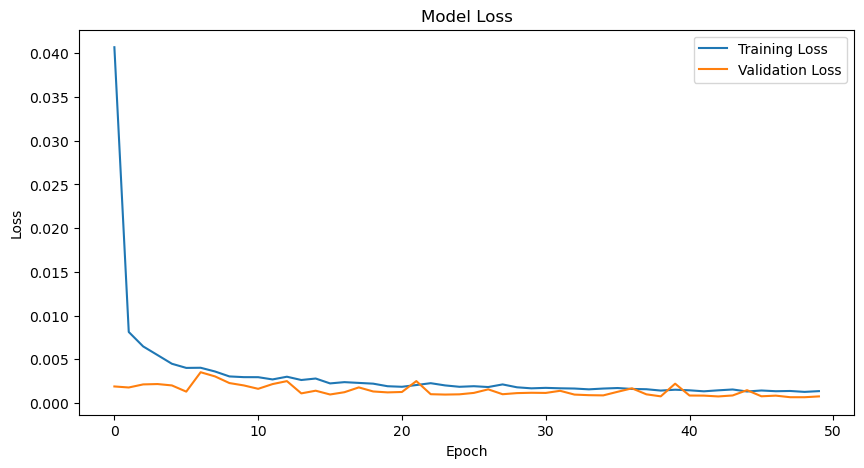

In [113]:
# 构建 GRU 模型
model = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.4),
    GRU(50, return_sequences=False),
    Dropout(0.4),
    Dense(25, activation='relu'),
    Dense(1)  # 输出单值
])

# 编译模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型（50 轮）
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=50,  # 训练 50 次
    validation_data=(X_test, y_test), 
    verbose=1
)

# 绘制训练和验证损失
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [114]:
# 模型预测（在测试集上）
y_pred = model.predict(X_test)

# 反归一化预测值和真实值
y_pred_rescaled = scaler.inverse_transform(
    np.concatenate([y_pred, np.zeros((y_pred.shape[0], 3))], axis=1)
)[:, 0]
y_test_rescaled = scaler.inverse_transform(
    np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))], axis=1)
)[:, 0]

# 计算评估指标
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100

# 打印结果
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Mean Squared Error (MSE): 21.07
Root Mean Squared Error (RMSE): 4.59
Mean Absolute Error (MAE): 3.63
Mean Absolute Percentage Error (MAPE): 3.05%


In [115]:
# 下载 2024 年 1 月的数据
data_2024 = yf.download('AMZN', start='2024-01-01', end='2024-01-31')

# 获取最后 5 天的数据
last_5_days = data[-5:][['Adj Close', 'MA10', 'MA50', 'Volume Change']].values

# 构建预测输入
X_2024 = []
current_input = last_5_days
for _ in range(len(data_2024)):
    X_2024.append(current_input[-5:])
    next_pred = model.predict(np.array([X_2024[-1]]))
    next_row = np.zeros((1, current_input.shape[1]))
    next_row[0, 0] = next_pred  # 预测的 Adj Close
    next_row[0, 1:] = current_input[-1, 1:]  # 其他特征不变
    current_input = np.append(current_input, next_row, axis=0)

# 转换为 NumPy 数组
X_2024 = np.array(X_2024)

# 预测 2024 年的调整收盘价
y_pred_2024 = model.predict(X_2024)

# 反归一化预测值
y_pred_2024_rescaled = scaler.inverse_transform(
    np.concatenate([y_pred_2024, np.zeros((y_pred_2024.shape[0], 3))], axis=1)
)[:, 0]

# 添加预测值到 2024 年数据
data_2024['Predicted Adj Close'] = y_pred_2024_rescaled

# 打印结果
print(data_2024[['Adj Close', 'Predicted Adj Close']])


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Price        Adj Close Predicted Adj Close
Ticker            AMZN                    
Date                                      
2024-01-02  149.929993          148.685557
2024-01-03  148.470001          147.265490
2024-01-04  144.570007          145.573857
2024-01-05  145.2400

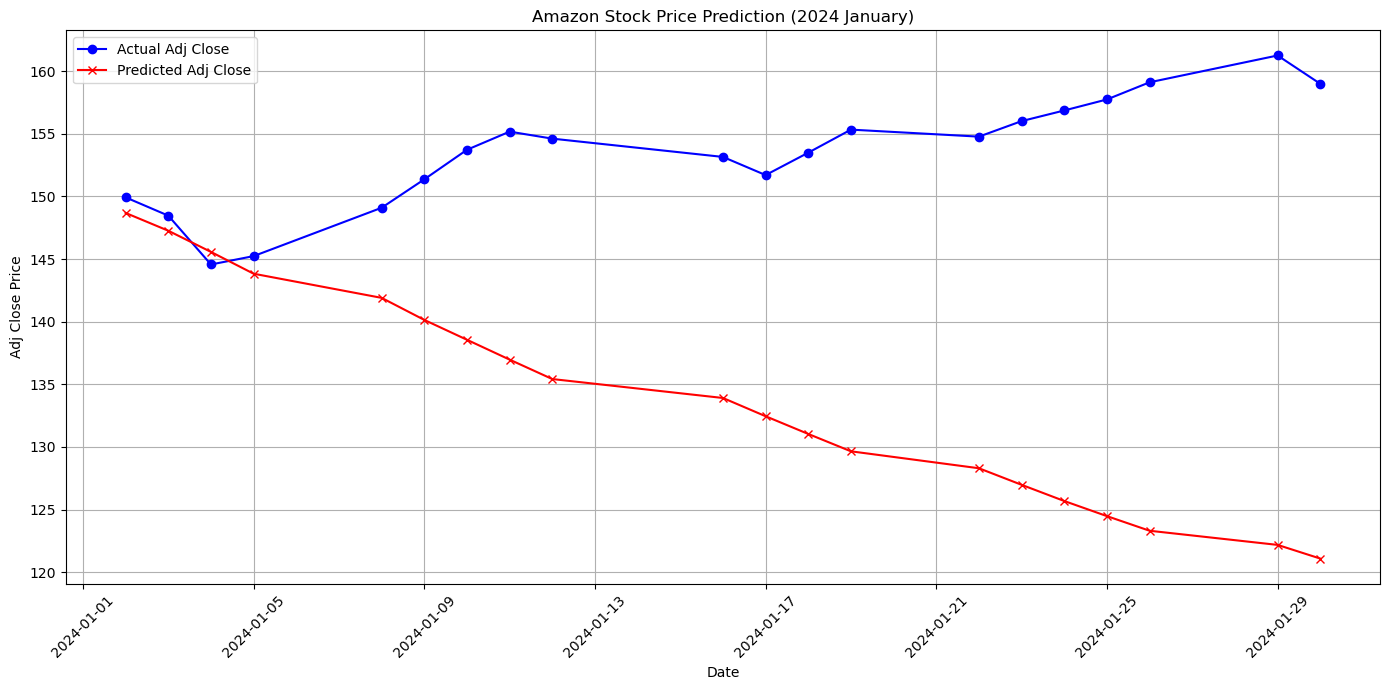

In [116]:
# 绘制真实值与预测值对比
plt.figure(figsize=(14, 7))
plt.plot(data_2024.index, data_2024['Adj Close'], label='Actual Adj Close', marker='o', color='blue')
plt.plot(data_2024.index, data_2024['Predicted Adj Close'], label='Predicted Adj Close', marker='x', color='red')
plt.title('Amazon Stock Price Prediction (2024 January)')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


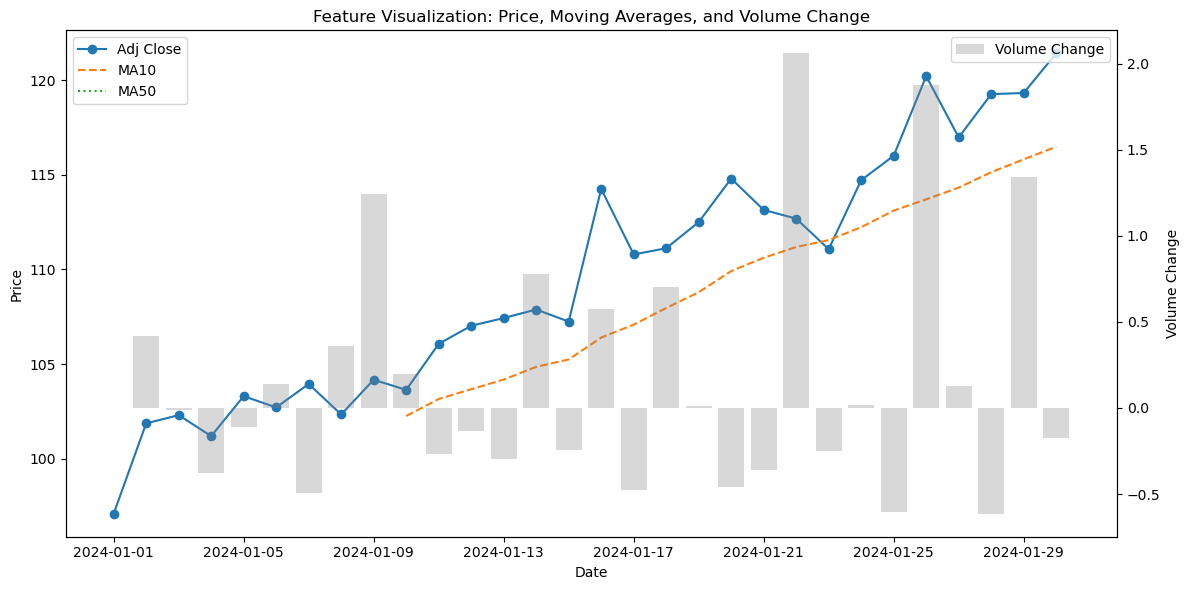

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate dummy data for demonstration
dates = pd.date_range(start="2024-01-01", periods=30)
prices = np.linspace(100, 120, len(dates)) + np.random.normal(0, 2, len(dates))
ma10 = pd.Series(prices).rolling(window=10).mean()
ma50 = pd.Series(prices).rolling(window=50).mean()
volume = np.random.randint(1000, 5000, size=len(dates))
volume_change = pd.Series(volume).pct_change()

# Create a simple data visualization
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price and moving averages
ax1.plot(dates, prices, label='Adj Close', marker='o')
ax1.plot(dates, ma10, label='MA10', linestyle='--')
ax1.plot(dates, ma50, label='MA50', linestyle=':')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(loc='upper left')

# Plot volume change as bar chart on secondary y-axis
ax2 = ax1.twinx()
ax2.bar(dates, volume_change, alpha=0.3, color='grey', label='Volume Change')
ax2.set_ylabel('Volume Change')
ax2.legend(loc='upper right')

# Formatting
plt.title('Feature Visualization: Price, Moving Averages, and Volume Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
